<a href="https://colab.research.google.com/github/ranyapendyala/BME450-project/blob/main/450_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/abdulkader90/brain-ct-hemorrhage-dataset/data

In [ ]:
### IMPORTING TOOLBOXES/LIBRARIES ###

from google.colab import drive
drive.mount('/content/drive')

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

Mounted at /content/drive


Training classes:  ['No Trauma', 'Trauma']
Testing classes:  ['No Trauma', 'Trauma']


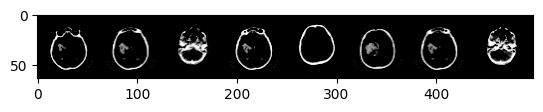

From left to right on the above grid of images...
Image 1 classification: Trauma
Image 2 classification: Trauma
Image 3 classification: Trauma
Image 4 classification: Trauma
Image 5 classification: Non-trauma
Image 6 classification: Trauma
Image 7 classification: Trauma
Image 8 classification: Trauma


In [ ]:
# Transform and resize images to 60x60
transform = transforms.Compose([
    transforms.Resize((60, 60)),  # resizes image to 60x60   # IF WE CHANGE THIS WE HAVE TO UPDATE INPUTS THING B/C MATRIX MULTIPLICATION GETS WEIRD
    transforms.ToTensor(),  # converts image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalizes image
])

# Loading datasets from drive
train_data = datasets.ImageFolder(root='/content/drive/MyDrive/BME450/train', transform=transform)
test_data = datasets.ImageFolder(root='/content/drive/MyDrive/BME450/test', transform=transform)

# Checking to see if folders are being called correctly
print('Training classes: ', train_data.classes)
print('Testing classes: ', test_data.classes)


# Defining batch sizes for train/test and creating train/test loaders
batch_size_train = 8
batch_size_test = 40

train_loader = DataLoader(train_data, batch_size=batch_size_train, shuffle=True, num_workers=4)
test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True, num_workers=4)

classes = ('Non-traumatic','Traumatic')  # defining classes


# Getting images from data loader and plotting sample images and classification
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images, nrow=8)
grid = np.transpose(grid, (1, 2, 0))
plt.imshow(grid)
plt.axis('on')
plt.show()

print('From left to right on the above grid of images...')
img_num = 1  # for labeling purposes
n = 0  # counter variable for tensor indexing
for n in labels:
  # print(n)  # checking index
  if n == 0:
    print(f'Image {img_num} classification: Non-trauma')
  elif n == 1:
    print(f'Image {img_num} classification: Trauma')

  img_num += 1  # iterating to next image number


# Defining convolutional nerual network (CNN)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #3 channels, 6 kernels, 5x5 kernel size. convolutional
        self.pool = nn.MaxPool2d(2, 2) #2x2 pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5) #6 channels, 16 kernels, 5x5 kernel size. convolutional
        self.fc1 = nn.Linear(2304, 120) # nn.Linear(16 * 5 * 5, 120) -> input 2304, output 120. fully connecting
        self.fc2 = nn.Linear(120, 84) # input 120, output 84 fully connecting
        self.fc3 = nn.Linear(84, 10) # input 84, output 10 fully connecting

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flattens all dimensions other than batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

n_net = Net()  # neural network

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(n_net.parameters(), lr=0.001, momentum=0.9)  # learning rate 1e-3


2
3
4
5
6
7
8
9
10
11
Training Finished
0


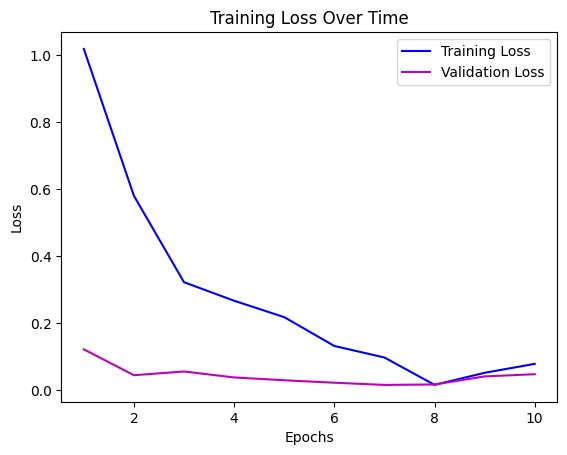

Test loss for epochs 1 through 10: [0.12235074520111083, 0.04516786217689514, 0.05626784324645996, 0.038479622602462765, 0.030091446042060852, 0.02272976279258728, 0.01616437315940857, 0.01755725957453251, 0.04159180194139481, 0.04812763094902039]
2


In [ ]:
### TRAINING ###

# array/variable definitions
train_loss = []
test_loss = []
epoch_arr = []
x = 1  # counter variable

for epoch in range(10):  # loops through dataset
    run_loss_train = 0.0
    num_batch = 0
    run_loss_test = 0.0

    # Train loader
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data  # gets inputs; data is list of [inputs, labels]
        optimizer.zero_grad()  # zero optimizer

        # forward + backward + optimize
        outputs = n_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        run_loss_train += loss.item()  # recording training loss

    train_loss.append(run_loss_train/50)
    run_loss_train = 0.0  # resetting training loss to 0

    # Test loader
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = n_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        run_loss_test += loss.item()  # recording testing loss

    test_loss.append(run_loss_test/50)
    run_loss_test = 0.0  # resetting testing loss to 0
    epoch_arr.append(x)
    x += 1  # iterating to next item
    print(x)

print('Training Finished')
print(num_batch)

# Plotting loss values over time
plt.plot(epoch_arr, train_loss, label = 'Training Loss', color = 'b')
plt.plot(epoch_arr, test_loss, label = 'Validation Loss', color = 'm')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

# Making sure everything is working and printing test loss
#(epoch_arr)  # troubleshooting
print(f'Test loss for epochs 1 through {len(epoch_arr)}: {test_loss}')
print(i)

# Saving script
PATH = './BME450'
torch.save(n_net.state_dict(), PATH)

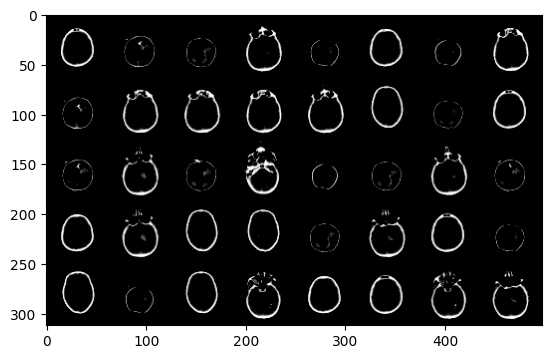

Actual classes:  Non-traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Non-traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Non-traumatic, Traumatic, Traumatic,
Predicted classes:  Non-traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Non-traumatic, Traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Traumatic, Non-traumatic, Non-traumatic, Traumatic

In [ ]:
### TESTING ###

dataiter = iter(test_loader)
images, labels = next(dataiter)  # returns next item in iterator

# Printing images and creating grid of images
grid = torchvision.utils.make_grid(images, nrow=8)
grid = np.transpose(grid, (1, 2, 0))
plt.imshow(grid)
plt.axis('on')
plt.show()
print('Actual classes: ', ' '.join(f'{classes[labels[j]]:5s},' for j in (range(batch_size_test))))  # Ground truth print statement that lists everything in one line acorrding to the tensor index

# Calling saved model
n_net = Net()
n_net.load_state_dict(torch.load(PATH))
outputs = n_net(images)
_, predicted = torch.max(outputs, 1)  # highest energy

print('Predicted classes: ', ' '.join(f'{classes[predicted[j]]:5s},' for j in (range(batch_size_test))))

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        # calculating outputs by running images through the network
        images, labels = data
        outputs = n_net(images)
        _, predicted = torch.max(outputs.data, 1)  # class w/highest energy is prediction
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total > 100:  # to not go over 100%
          break

print(f'Accuracy of the network on the {batch_size_test} test images: {(100 * correct / total):.2f} %')


# Preparing to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Predictions for each class
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = n_net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            if dict(total_pred) == batch_size_test:
              break


# Printing accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.2f} %')